# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# First combine the x_train.csv and y_train.csv into a single Dataframe

In [8]:
df_basis = pd.read_csv('/content/x_train_final_asAbTs5.csv')
df_spalte = pd.read_csv('/content/y_train_final_YYyFil7.csv')

# Renaming of the y-column
df_spalte.rename(columns={df_spalte.columns[1]: 'invalid_ratio'}, inplace=True)

# using'inner merge' ro join both csv into one
df_gesamt = pd.merge(
    df_basis,
    df_spalte,
    on='Unnamed: 0',  # Name of the category on which the merge will be done.
    how='inner'
)

print(f"Anzahl Zeilen nach innerem Merge: {len(df_gesamt)}")

Anzahl Zeilen nach innerem Merge: 1752871


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [12]:
import pandas as pd

# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('/content/x_train_final_asAbTs5.csv')

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())
print(df.tail(10))


Number of samples: 6076546
Number of features: 11
Example data:
   Unnamed: 0  total_count  longitude_scaled  latitude_scaled  Precipitations  \
0           0            1          0.998417         0.996118             0.0   
1           1           35          0.999222         0.996000             0.0   
2           2            3          0.998371         0.996309             1.8   
3           3            1          0.998804         0.996343             0.0   
4           4            2          0.999126         0.996417             0.0   

   HauteurNeige  Temperature  ForceVent  day_of_week  month_of_year  hour  
0           0.0         14.6        2.5            3              4     8  
1           0.0         22.4        3.1            5              3    13  
2           0.0         11.7        3.3            4             10     8  
3           0.0         28.6        2.6            4              2    16  
4           0.0          9.6        3.2            3              9  

In [13]:
# Showig the descriptive stat for the 'total_count' column
variablenname = 'ongitude_scaled'


statistik = df_gesamt['longitude_scaled'].describe()

print(f"--- Descriptive Statistics for '{variablenname}' ---")
print(statistik)

--- Descriptive Statistics for 'ongitude_scaled' ---
count    1.752871e+06
mean     9.988537e-01
std      3.356216e-04
min      9.807776e-01
25%      9.985862e-01
50%      9.988580e-01
75%      9.991165e-01
max      9.997933e-01
Name: longitude_scaled, dtype: float64


In [14]:
max_total_count = df_gesamt['total_count'].max()

print(f"The biggest value of the variable 'total_count' is: {max_total_count}")


index_max = df_gesamt['total_count'].idxmax()

# 2. Die gesamte Zeile mit diesem Index abrufen
# Mit .loc[index] rufen Sie die gesamte Zeile im DataFrame ab, die zu diesem Index gehört.
zeile_mit_max_wert = df_gesamt.loc[index_max]

# 3. Ausgabe
print(f"Index (Zeilennummer) der Zeile mit dem maximalen 'total_count': {index_max}")
print("-" * 50)
print("Details der Beobachtung mit dem höchsten 'total_count':")
print(zeile_mit_max_wert)

The biggest value of the variable 'total_count' is: 1100
Index (Zeilennummer) der Zeile mit dem maximalen 'total_count': 424115
--------------------------------------------------
Details der Beobachtung mit dem höchsten 'total_count':
Unnamed: 0          424115.000000
total_count           1100.000000
longitude_scaled         0.998220
latitude_scaled          0.995759
Precipitations           0.000000
HauteurNeige             0.000000
Temperature             18.600000
ForceVent                1.900000
day_of_week              1.000000
month_of_year            1.000000
hour                     8.000000
invalid_ratio            1.000000
Name: 424115, dtype: float64


In [15]:
import pandas as pd

# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
df2 = pd.read_csv('/content/y_train_final_YYyFil7.csv')

# Number of samples
num_samples = df2.shape[0]

# Number of features
num_features = df2.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df2.head())
print(df2.tail())



Number of samples: 6076546
Number of features: 2
Example data:
   Unnamed: 0  invalid_ratio
0           0       0.000000
1           1       0.228571
2           2       1.000000
3           3       0.000000
4           4       0.500000
         Unnamed: 0  invalid_ratio
6076541     6076541       0.444444
6076542     6076542       0.090909
6076543     6076543       0.333333
6076544     6076544       0.357143
6076545     6076545       1.000000


## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [11]:
# Check for missing values
missing_values = df_gesamt.isnull().sum()
missing_values


,0
Unnamed: 0,0
total_count,0
longitude_scaled,0
latitude_scaled,0
Precipitations,0
HauteurNeige,47183
Temperature,0
ForceVent,1726
day_of_week,0
month_of_year,0


In [ ]:
# Handling missing values
# Example: Replacing NaN values with the mean value of the column
# df.fillna(df.mean(), inplace=True)

# Your code for handling missing values goes here


## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


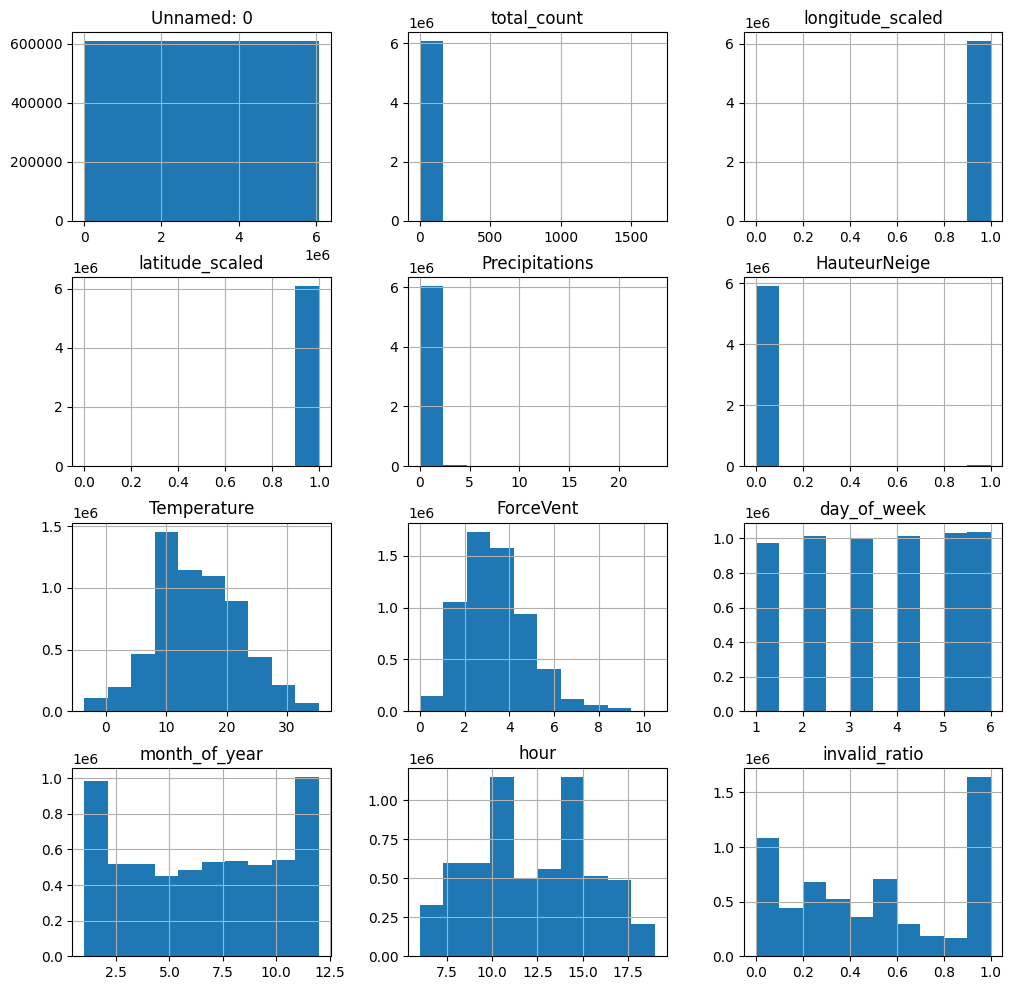

In [ ]:
# Example: Plotting histograms of all numerical features
df_gesamt.hist(figsize=(12, 12))
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


In [ ]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


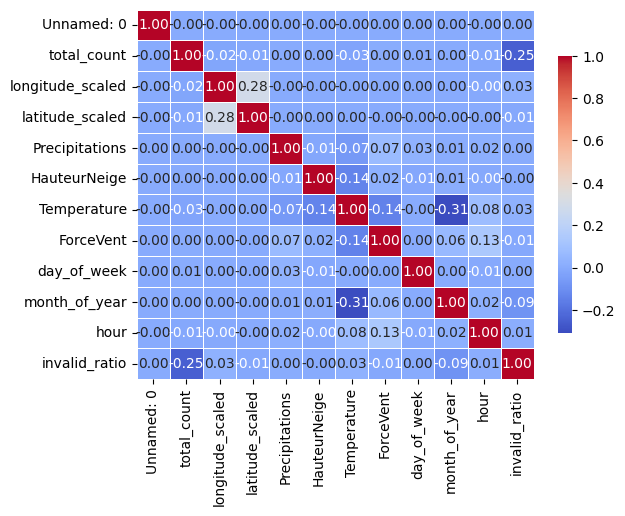

In [ ]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = df_gesamt.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,        # Zeigt die Korrelationswerte in den Zellen an
    fmt=".2f",         # Formatierung der Annotationen auf 2 Nachkommastellen
    cmap='coolwarm',   # Farbpalette (z.B. 'coolwarm', 'viridis', 'plasma', 'RdBu_r')
    linewidths=.5,     # Linien zwischen den Zellen für bessere Trennung
    cbar_kws={"shrink": .75}, # Größe der Farbleiste anpassen
    annot_kws={"size": 10} # Schriftgröße der Werte in den Zellen anpassen
)
plt.show()

